# Image Watermarking
In this project, we will see how we can add a watermark to an image. Adding a mwtermark works as a copyright for your image, so that no one can illegally use your image or document. 

We will use OpenCV for this project to add logo and text as a watermark.

In [1]:
# import libraries
import cv2
import numpy as np
import requests
from PIL import Image

* For this project, we need an image url on which we will apply the watermark. 

* We will load the image using the url of the image.

* You can use any image that you desire and replace the url of the image with the one given below.

* Next, we will read and resize the image and store it into variables.

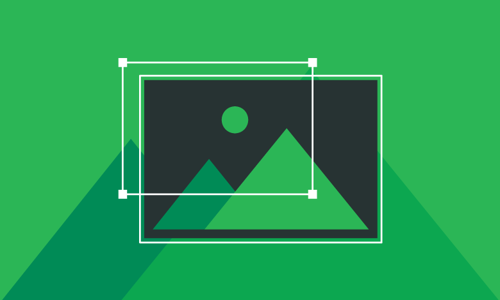

In [11]:
# reading image form url
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

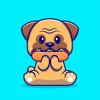

In [12]:
# load logo
logo = Image.open('dog_logo.webp')
logo = logo.resize((100, 100))
logo

In [13]:
# convert into numpy arrays
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [14]:
print(h_image, w_image, h_logo, w_logo)

300 500 100 100


We will place the watermark in the center of the image. Therefore we need to calculate the center of the image

In [15]:
# center of image
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

**Note:** Region of interest is the area we need to place the watermark

In [16]:
# finding region of interest
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

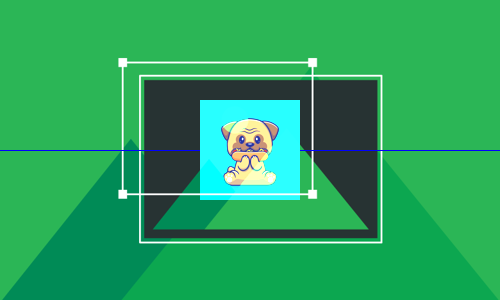

In [17]:
# plotting logo on watermark
img = Image.fromarray(image_logow, 'RGB')
img

In [22]:
# text watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='D-Comp', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(251,0,255), thickness=2, lineType=cv2.LINE_4);

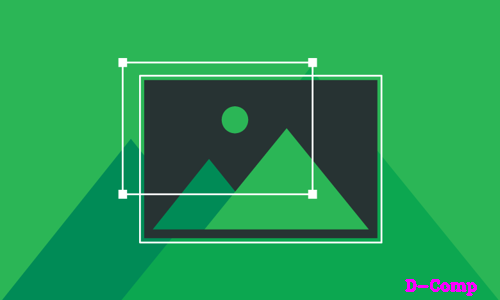

In [23]:
# plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg

## Conclusion
Adding a watermark to an image works as a copyright. Different organizations can use it to make their content secure so that their content cannot be misused without thier license or a paid version. In this project we saw how easily we can use OpenCV to add watermarks to our images. 